# Graph of global surface temperature from 1880 to present

The data to generate this graph comes from the Goddard Institute for Space Studies (GISS) Surface Temperature Dataset (GISTEMP) available [here](http://data.giss.nasa.gov/gistemp/)

Data used are Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies (Land-Ocean Temperature Index, LOTI),
Global-mean monthly, seasonal, and annual means, 1880-present, updated through most recent month in TXT and CSV format. Anomalies are based around 1951-1980 average temperatures. 

### Load packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import Span, HoverTool
%matplotlib inline

### Read in CSV data

In [2]:
data = pd.read_csv("http://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.csv", na_values = ["**** ","***  ", "***"],skiprows=1)

### Select necessary columns

In [4]:
df = data.iloc[:,1:13]

In [5]:
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-0.09,-0.16,-0.23,-0.20,-0.23
1,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-0.03,-0.14,-0.21,-0.22,-0.11
2,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-0.06,-0.10,-0.25,-0.16,-0.25
3,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-0.15,-0.21,-0.14,-0.22,-0.16
4,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-0.26,-0.27,-0.24,-0.30,-0.29
...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.81,0.87,0.90,0.75,0.75,0.79,0.71,0.79,0.82,1.07,1.03,1.10
136,1.15,1.35,1.31,1.07,0.91,0.77,0.82,1.00,0.88,0.90,0.91,0.83
137,0.98,1.13,1.13,0.92,0.89,0.70,0.82,0.87,0.76,0.88,0.86,0.89
138,0.77,0.85,0.91,0.87,0.81,0.74,0.78,0.73,0.76,0.99,0.78,0.89


### Convert to Celsius (divide by 100)

In [4]:
#df = df.divide(100)

### Add a year column

In [6]:
df['Year'] = data['Year']

### Index by year and stack the data, then reset the index

In [7]:
df2 = df.set_index('Year').stack().reset_index()

### Name the columns

In [8]:
df2.columns = ['Year','Month','Value']

### Add Datetime column based on year and month

In [9]:
df2["Date"] = pd.to_datetime(df2.Year.astype(str) + "-" + df2.Month, format="%Y-%b")
print(df2)

      Year Month  Value       Date
0     1880   Jan  -0.29 1880-01-01
1     1880   Feb  -0.18 1880-02-01
2     1880   Mar  -0.11 1880-03-01
3     1880   Apr  -0.20 1880-04-01
4     1880   May  -0.12 1880-05-01
...    ...   ...    ...        ...
1670  2019   Mar   1.11 2019-03-01
1671  2019   Apr   0.97 2019-04-01
1672  2019   May   0.85 2019-05-01
1673  2019   Jun   0.86 2019-06-01
1674  2019   Jul   0.90 2019-07-01

[1675 rows x 4 columns]


### Plot the monthly data

Text(0, 0.5, 'Degrees C')

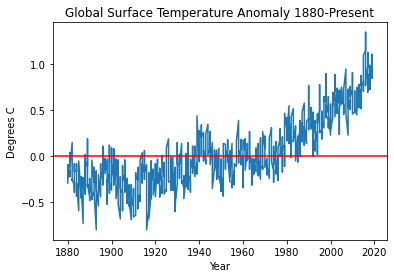

In [10]:
plt.plot(df2['Year'], df2['Value']) #plot x and y variables
plt.axhline(0,color='red') #red line marking 0
plt.title('Global Surface Temperature Anomaly 1880-Present') #title
plt.xlabel('Year')
plt.ylabel('Degrees C')

### Plot the Annual anomalies

In [11]:
#convert to Degrees C
data['J-D'] = data['J-D']/100

Text(0, 0.5, 'Degrees C')

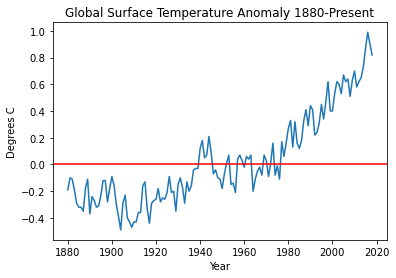

In [12]:
plt.plot(data['Year'], data['J-D']*100) #x and y axis  (*100 to convert to celsius)
plt.axhline(0,color='red')
plt.title('Global Surface Temperature Anomaly 1880-Present') #title
plt.xlabel('Year')
plt.ylabel('Degrees C')

### Using Bokeh

In [13]:
output_notebook() #must be included for plot to show in notebook

Loading BokehJS ...

In [14]:
from bokeh.models import HoverTool, BoxSelectTool, WheelZoomTool
tools = [BoxSelectTool(), HoverTool(), WheelZoomTool()]

p = figure(plot_width = 800, plot_height=400,
           title ='Monthly Mean Temperature Anomaly (1951-1980 baseline)',
           x_axis_type="datetime", tools = tools) 

p.line(df2['Date'], df2['Value'])  

hline = Span(location=0, dimension='width', 
             line_color='red', 
             line_width=1) #red line at 0

p.renderers.extend([hline]) #add line to the plot
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Temperature (Degrees C)'
p.title.text_font_size = '14pt'
#output_notebook('monthanomaly.html')      
show(p)

### Annual Temperature Anomaly

In [15]:
p = figure(plot_width = 800, plot_height=400, 
           title ='Annual Mean Temperature Anomaly (1951-1980 baseline)') 

p.line(data['Year'], data['J-D']*100)  #*100 to convert to celsius
hline = Span(location=0, dimension='width', 
             line_color='red', 
             line_width=1) #red line at 0

p.renderers.extend([hline]) #add line to the plot
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Temperature (Degrees C)'
p.title.text_font_size = '14pt'
show(p)